In [5]:
# Core libraries
import pandas as pd        # for dataframes 
import numpy as np         # for numerical operations

# Visualization
import matplotlib.pyplot as plt   # base plotting
import seaborn as sns             # prettier plots built on matplotlib

# optional: set a theme for seaborn
sns.set_theme()


- pandas → work with tabular data (CSV → dataframe).
- numpy → supports math operations (needed under the hood by ML & pandas).
- matplotlib.pyplot → plotting library for charts.
- seaborn → makes statistical plots (count plots, heatmaps, boxplots) easier and prettier

In [14]:
df = pd.read_csv('TravelInsurancePrediction.csv')
print('Shape of data', df.shape)

Shape of data (1987, 10)


In [7]:
# Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [9]:
# Summary of numbers
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [11]:
# Missing values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

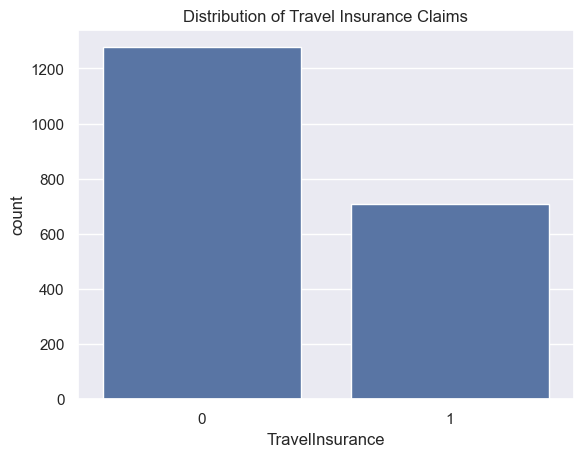

In [18]:
# Countplot of target (TravelInsurance)
sns.countplot(x="TravelInsurance", data=df)
plt.title("Distribution of Travel Insurance Claims")
plt.show()


- What the chart tells you:
- If both bars (0 and 1) are almost equal → your dataset is balanced.
- If one bar is much taller (e.g., many more 0s than 1s) → your dataset is imbalanced, meaning the model could be biased toward the majority class.
- In our chart, the bar for 0 is taller.
That means:
- More people in your dataset did NOT buy insurance (TravelInsurance = 0)
- Fewer people did buy insurance (TravelInsurance = 1)
- Why this matters for ML
- This situation is called a class imbalance:
- The model might get biased toward predicting 0 more often (because it’s the majority).
- Example: If 80% are 0 and 20% are 1, a dumb model predicting “always 0” would already be 80% accurate — but it would completely miss the actual buyers (1s).
✅ How we’ll handle this imbalance
- When we train Logistic Regression, we’ll tell scikit-learn to balance the classes:

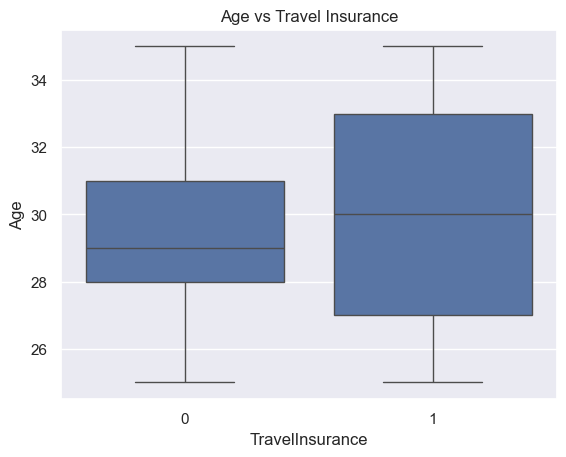

In [19]:
# Boxplot (Age vs Insurance)
# Numeric Features vs Target
sns.boxplot(x="TravelInsurance", y="Age", data=df)
plt.title("Age vs Travel Insurance")
plt.show()
#This shows whether people of certain ages are more likely to buy insurance.

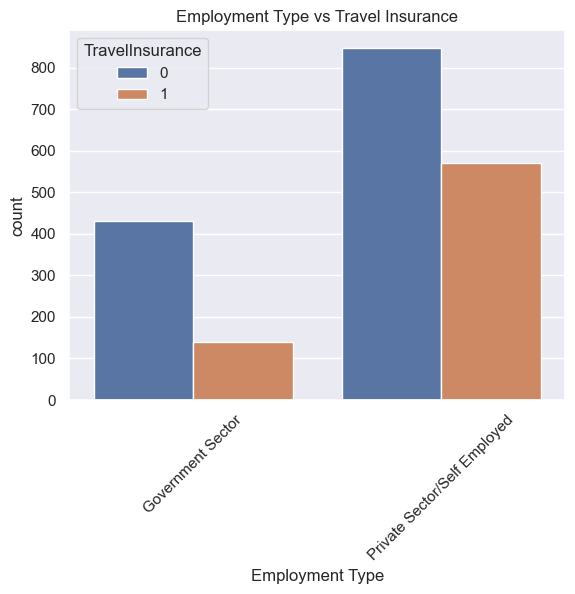

In [20]:
# Countplot (Employment vs Insurance)

#Categorical Features vs Target
#Example: Employment Type

sns.countplot(x="Employment Type", hue="TravelInsurance", data=df)
plt.title("Employment Type vs Travel Insurance")
plt.xticks(rotation=45)
plt.show()

# This shows how different job types affect insurance buying.

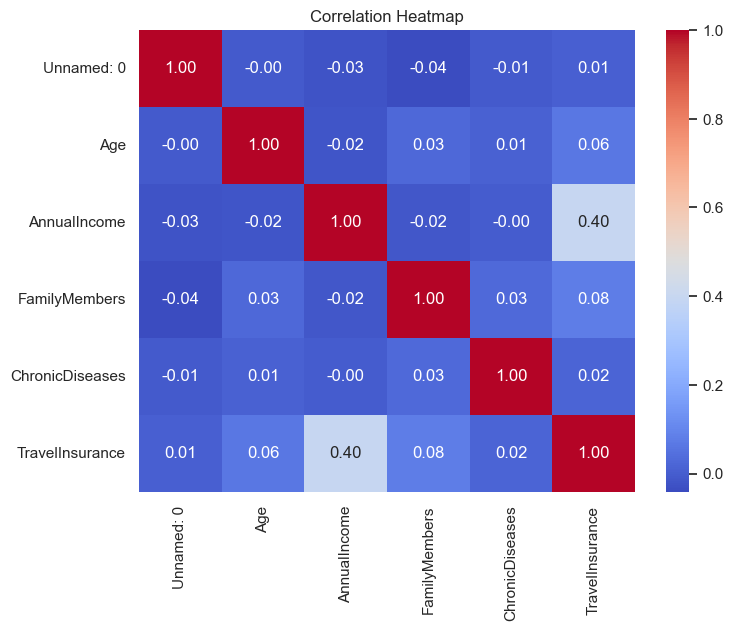

In [32]:
# Correlation heatmap

#Check Correlation Among Numeric Columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#👉 Helps you see if columns like Age, AnnualIncome, FamilyMembers are strongly related.

## Encode categorical variables (gender, vehicle type, etc.) ✅
- Used OneHotEncoder inside pipeline.

## Preprocessing the dataset so it’s ready for Logistic Regression.

We need to:
- Separate features (X) and target (y).
- Identify numeric vs categorical columns.
- Encode categorical columns (OneHotEncoder).
- Scale numeric columns (StandardScaler).
- Handle missing values (SimpleImputer).

In [22]:
# Separate features and target
target = "TravelInsurance"   # column we want to predict
X = df.drop(columns=[target])   # features
y = df[target]                  # target

In [23]:
#Identify column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

#This helps us decide what preprocessing to apply to each type.

Numeric columns: ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']
Categorical columns: ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']


In [24]:
#Preprocessing Pipelines
#Let’s drop the Unnamed: 0 column and rebuild preprocessing:

# Drop the index-like column
X = X.drop(columns=["Unnamed: 0"])

# Update numeric and categorical columns
num_cols = ["Age", "AnnualIncome", "FamilyMembers", "ChronicDiseases"]
cat_cols = ["Employment Type", "GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]

# Pipelines remain same
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

## - Split the data into training & testing sets and fit Logistic Regression.

We’ll split the dataset into:
- Training set (80%) → used to train the model.
- Testing set (20%) → used to evaluate how well the model works on unseen data.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


- test_size=0.2 → 20% data for testing.
- random_state=42 → ensures reproducibility (you get the same split every time).
- stratify=y → keeps the class balance (0 vs 1) the same in both train & test sets.

In [26]:
# Build Logistic Regression Model

# We’ll connect the preprocessor with the Logistic Regression model in one pipeline:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Build pipeline: preprocessing + model
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight="balanced", max_iter=1000))
])


# class_weight="balanced" → handles imbalance (so model doesn’t just predict 0 always).

#max_iter=1000 → gives the model enough iterations to converge.

## Train the Model
This will:
- Apply preprocessing to X_train.
- Train logistic regression on the transformed data.

In [27]:
log_reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation.
- We’ll check how well our Logistic Regression model performs.

In [28]:
# Make Predictions
y_pred = log_reg_pipeline.predict(X_test)
#This gives predictions (0 or 1) for the test set.

In [29]:
# Accuracy Score

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tells you the percentage of correct prediction

Accuracy: 0.7135678391959799


In [30]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       256
           1       0.59      0.62      0.61       142

    accuracy                           0.71       398
   macro avg       0.69      0.69      0.69       398
weighted avg       0.72      0.71      0.71       398



Shows:
- Precision (how many predicted 1s were actually 1)
- Recall (how many actual 1s the model caught)
- F1-score (balance of precision & recall)
- Support (how many samples per class)
- This is very useful in imbalanced datasets.

This tells you:
- Precision → of all predicted 1s, how many were actually 1.
- Recall → of all actual 1s, how many were caught.
- F1-score → balance of precision & recall (important for imbalanced data).

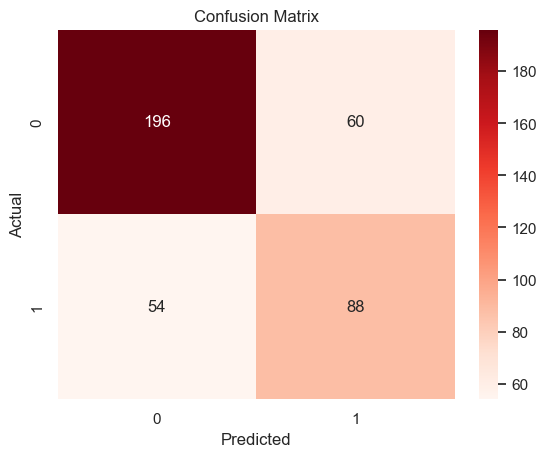

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 👉 This shows:
- True Negatives (top-left): correctly predicted 0s z( no insurance)
- False Positives (top-right): predicted 1 but actually 0
- False Negatives (bottom-left): predicted 0 but actually 1
- True Positives (bottom-right): correctly predicted 1s ( buy insurances)

## Deploy with Streamlit

In [37]:
# Save Your Model Pipeline
# We’ll save the trained pipeline (log_reg_pipeline) so Streamlit can load it.

import joblib
# Save the trained pipeline
joblib.dump(log_reg_pipeline, "insurance_model.pkl")

#This creates a file insurance_model.pkl (your trained model).

['insurance_model.pkl']

# Create Streamlit App (app.py)
- Make a new file app.py with this code:

2025-09-07 18:31:04.971 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31:05.424 
  command:

    streamlit run C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-07 18:31:05.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31:05.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31:05.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31:05.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31:05.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 18:31: